<a href="https://colab.research.google.com/github/hiro106/statistics_ml_cs_learning/blob/main/Fastest_dimension_of_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/agilescientific/notebooks/blob/master/Fastest_dimension_of_array.ipynb

トレース＆カスタマイズで理解する  
I will comprehend the contents of this notebook by tracing and customizing them.

# Which is the fastest axis of an array?

I'd like to know: which axes of a NumPy array are fastest to access?

In [1]:
import numpy as np

In [2]:
np

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

In [3]:
%matplotlib inline

In [4]:
matplotlib

Using matplotlib backend: agg


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

## A tiny example

In [7]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
' '.join(str(i) for i in a.ravel(order='C'))

'0 1 2 3 4 5 6 7 8'

In [9]:
' '.join(str(i) for i in a.ravel(order='F'))

'0 3 6 1 4 7 2 5 8'

## A seismic volume

In [10]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [11]:
volume = np.load("/drive/My Drive/Colab Notebooks/data/F3_volume_3x3_16bit.npy")

In [12]:
volume

array([[[    0,     0,     0, ...,  1779,  1476,  -129],
        [    0,     0,     0, ...,  1175,  -273,   598],
        [    0,     0,     0, ...,   574,  -526,   302],
        ...,
        [-1209, -1209, -1209, ...,  4127,  1873,  2032],
        [ -151,  -151,  -151, ...,  3619,  2145,  1522],
        [ -864,  -864,  -864, ...,  4260,  2667,   405]],

       [[-1018, -1018, -1018, ...,  1050,  1238,   189],
        [-1173, -1173, -1173, ...,  1310,   324,   289],
        [ -417,  -417,  -417, ...,   823,  -466,   447],
        ...,
        [-2029, -2029, -2029, ...,  3973,   363,   468],
        [-1869, -1869, -1869, ...,  3741,  1296,   967],
        [-1065, -1065, -1065, ...,  3327,  2041,  1132]],

       [[ -425,  -425,  -425, ...,   -12,  1142,  1162],
        [  -42,   -42,   -42, ...,   760,  -109,   136],
        [ -443,  -443,  -443, ...,    25,  -615,   195],
        ...,
        [    0,     0,     0, ...,  3430,   638,   804],
        [ -490,  -490,  -490, ...,  3741,  11

In [13]:
volume.shape

(194, 299, 451)

Let's look at how the indices vary:

In [14]:
idx = np.indices(volume.shape)

In [15]:
idx.shape

(3, 194, 299, 451)

In [16]:
idx

array([[[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],

        [[  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         ...,
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1]],

        [[  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         ...,
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2]],

        ...,

        [[191, 191, 191, ..., 191, 191, 191],
         [191, 191, 191, ..., 191, 191, 191],
         [191, 191

In [17]:
from matplotlib.font_manager import FontProperties

In [18]:
annot = ['data[2, :, :]', 'data[:, 2, :]', 'data[:, :, 2]']

In [19]:
annot

['data[2, :, :]', 'data[:, 2, :]', 'data[:, :, 2]']

In [20]:
mono = FontProperties()

In [21]:
mono

In [22]:
mono.set_family('monospace')

In [23]:
mono

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3), facecolor='w')

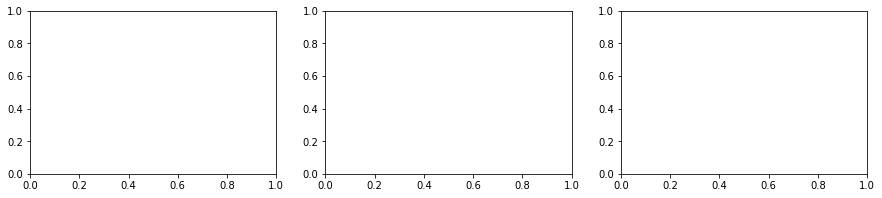

In [25]:
fig

In [26]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a348b5210>,
      dtype=object)

In [27]:
for i, ax in enumerate(axs):
    data = idx[i, :5, :5, :5].ravel(order='C')
    ax.plot(data, c=f'C{i}')
    ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)
    

In [46]:
data

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [41]:
data_ax0 = idx[0, :5, :5, :5]

In [43]:
data_ax0

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]],

       [[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]],

       [[4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]]])

In [44]:
data_ax1 = idx[1, :5, :5, :5]
data_ax1

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]])

In [45]:
data_ax2 = idx[2, :5, :5, :5]
data_ax2

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [30]:
data_c = data.ravel(order='C')
data_c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [31]:
data_f = data.ravel(order='F')
data_f

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [32]:
data = idx[i, :5, :5, :5].ravel(order='C')

In [33]:
data

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [34]:
ax.plot(data, c=f'C0')

In [35]:
ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)

In [36]:
ax.text(65, 4.3, 'axis 0', color='C0', size=15, ha='center')

Text(65, 4.3, 'axis 0')

"CN" color spec where 'C' precedes a number acting as an index into the default property cycle.  
https://matplotlib.org/stable/tutorials/colors/colors.html

In [37]:
ax.text(65, -0.7, annot[0], color='red', size=12, ha='center', fontproperties=mono)

Text(65, -0.7, 'data[2, :, :]')

In [38]:
ax.set_ylim(-1, 5)

(-1.0, 5.0)

In [39]:
for i, ax in enumerate(axs):
    data = idx[i, :5, :5, :5].ravel(order='C')
    ax.plot(data, c=f'C{i}')
    ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)
    ax.text(65, 4.3, f'axis {i}', color=f'C{i}', size=15, ha='center')
    ax.text(65, -0.7, annot[i], color='red', size=12, ha='center', fontproperties=mono)
    ax.set_ylim(-1, 5)

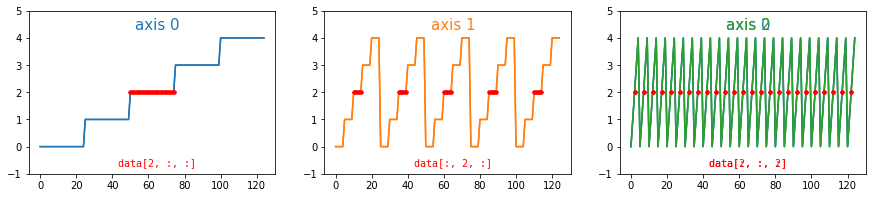

In [40]:
fig